In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as mpl
#import seaborn

#%matplotlib inline

from utils import tokenizer
from wordcloud import WordCloud
import nltk
from nltk import FreqDist

from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import tokenize    
from math import log
from os.path import basename, splitext
from os import listdir
import json


/mnt/c/Users/Luis/Projetos/lyrics/env3/local/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/mnt/c/Users/Luis/Projetos/lyrics/env3/local/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/mnt/c/Users/Luis/Projetos/lyrics/env3/local/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/mnt/c/Users/Luis/Projetos/lyrics/env3/local/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/mnt/c/Users/Luis/Projetos/lyrics/env3/

/mnt/c/Users/Luis/Projetos/lyrics/env3/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ball_tree import BallTree
/mnt/c/Users/Luis/Projetos/lyrics/env3/local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .kd_tree import KDTree


In [3]:
def plot_word_cloud(words, filename=None):
    wordcloud = WordCloud(
        width=800,
        height=600,
        max_words=500,
        scale=3,
    )

    wordcloud.generate_from_frequencies(dict(words))
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')
    
    plt.show()

In [4]:
def carregar_arquivo(arquivo):
    base = basename(arquivo)
    genero = splitext(base)[0]
    print(genero)
    genero_df = pd.read_csv(arquivo)
    return (genero_df, genero)

In [5]:
def carregar_arquivo_json(arquivo):
    base = basename(arquivo)
    genero = splitext(base)[0]
    print(genero)
    with open(arquivo) as f:
        genero_df = json.load(f)
    return (genero_df, genero)

In [6]:
def gerar_stopwords():
    STOP_WORDS = set(nltk.corpus.stopwords.words('portuguese'))
    
    for w in nltk.corpus.stopwords.words('portuguese'):
        STOP_WORDS.add(w.capitalize())
    
    STOP_WORDS.add("pra")
    STOP_WORDS.add("t")
    STOP_WORDS.add("E")
    STOP_WORDS.add(u"é")
    STOP_WORDS.add(u"É")
    STOP_WORDS.add(u"...")
    STOP_WORDS.add(u"''")
    STOP_WORDS.add(u"``")
    STOP_WORDS.add(u"2x")
    STOP_WORDS.add(u"A")
    STOP_WORDS.add(u"O")
    return STOP_WORDS

In [7]:
def remove_stopwords(freq_dist):
    
    # remove punctuation and stopwords
    for stopword in STOP_WORDS:
        if stopword in freq_dist:
            del freq_dist[stopword]

    for punctuation in tokenizer.CHARACTERS_TO_SPLIT:
        if punctuation in freq_dist:
            del freq_dist[punctuation]
    return freq_dist


In [8]:
def distribuicao_frequencia(arquivo):
    genero_df, genero = carregar_arquivo(arquivo)

    genero_all = " ".join(genero_df.lyric.values).decode('utf8')
    palavras_tokenize = tokenize.word_tokenize(genero_all, language='portuguese')
    
    genero_freq_dist = FreqDist(palavras_tokenize)
    genero_freq_dist = remove_stopwords(genero_freq_dist)
    return genero_freq_dist, genero
    
    

In [9]:
def word_cloud(genero_freq_dist, genero):
    plot_word_cloud(genero_freq_dist.most_common(200), "resources/full-" + genero + "-wordcloud.png")

In [10]:
def distribuicao_palavras(genero_freq_dist, genero):
    genero_word_frequencies = [x[1] for x in genero_freq_dist.most_common(200000)]
    plt.plot(genero_word_frequencies)

    plt.yscale("log")
    plt.xscale("log")

    plt.title("Word Frequencies", fontsize=16)
    plt.ylabel("Word Count", fontsize=14)
    plt.xlabel("Number of Words", fontsize=14)

    plt.savefig("resources/"+ genero + "-word-distribution.png")
    

In [11]:
def words_corpus_ranking(genero_freq_dist, portugues_freq_dist):
    
    #Remover palavras raras
    portugues_freq_dist = {k:v for k,v in portugues_freq_dist.items() if v > 5}
    n_portugues = sum(portugues_freq_dist.values())
    
    genero_freq_dist = {k:v for k,v in genero_freq_dist.items() if v > 5}
    n_genero = sum(genero_freq_dist.values())
    
    # combinar
    genero_rank = {}

    for w in genero_freq_dist.keys():
        if w in portugues_freq_dist.keys():
            if len(w) > 2:
                genero_rank[w] = log( (float(genero_freq_dist[w]) / float(n_genero)) / (float(portugues_freq_dist[w]) / float(n_genero)))
    return genero_rank

In [12]:
def list_to_markdown_table(lst, headings):
    assert(len(headings) == len(lst[0]))
    results = ""
    results += "|".join(headings) + "\n"
    results += "|".join(["---"] * len(headings)) + "\n"
    #print lst
    for elem in lst:
        results += "|"
        results += str(elem[0])
        results += "|"
        results += elem[1].encode('utf8')
        results += "|"
        results += str(elem[2])
        results += "\n"
        
    return results

In [13]:
STOP_WORDS = gerar_stopwords()

In [14]:
portugues = nltk.corpus.mac_morpho.words() + nltk.corpus.floresta.words()

In [15]:
portugues_freq_dist = FreqDist([w.lower() for w in portugues
                              if w not in STOP_WORDS])

### Carregando letras

bossa_nova


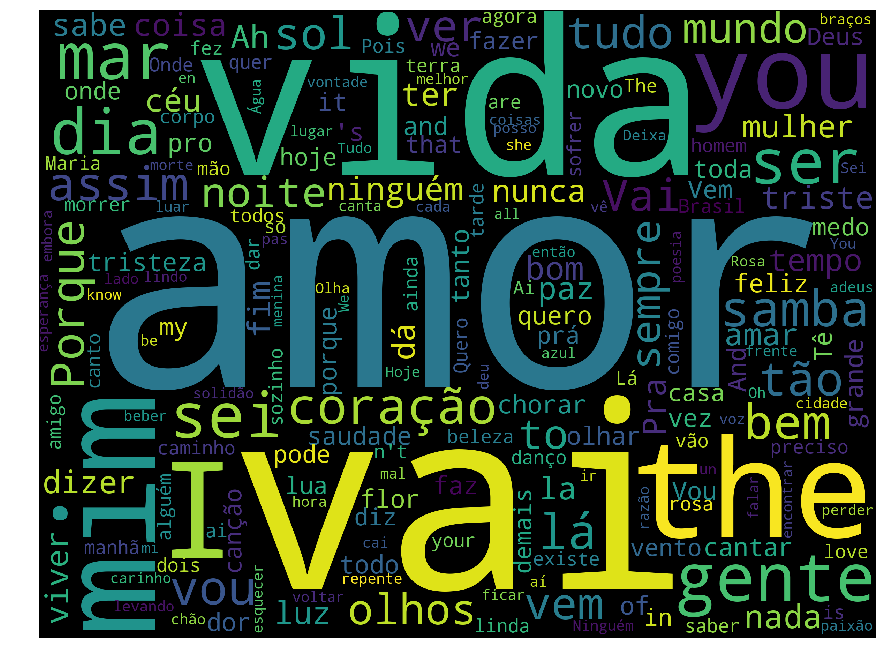

Rank|Word|Score
---|---|---
|0|you|3.64
|1|amar|2.82
|2|saudade|2.33
|3|chorar|2.25
|4|samba|2.20
|5|all|2.18
|6|tristeza|2.09
|7|amor|2.07
|8|flor|2.05
|9|with|2.01

funk


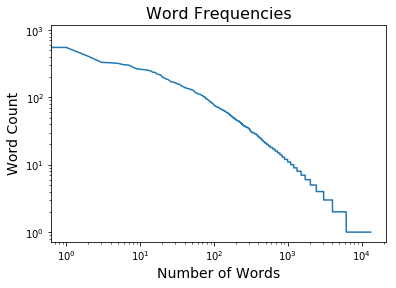

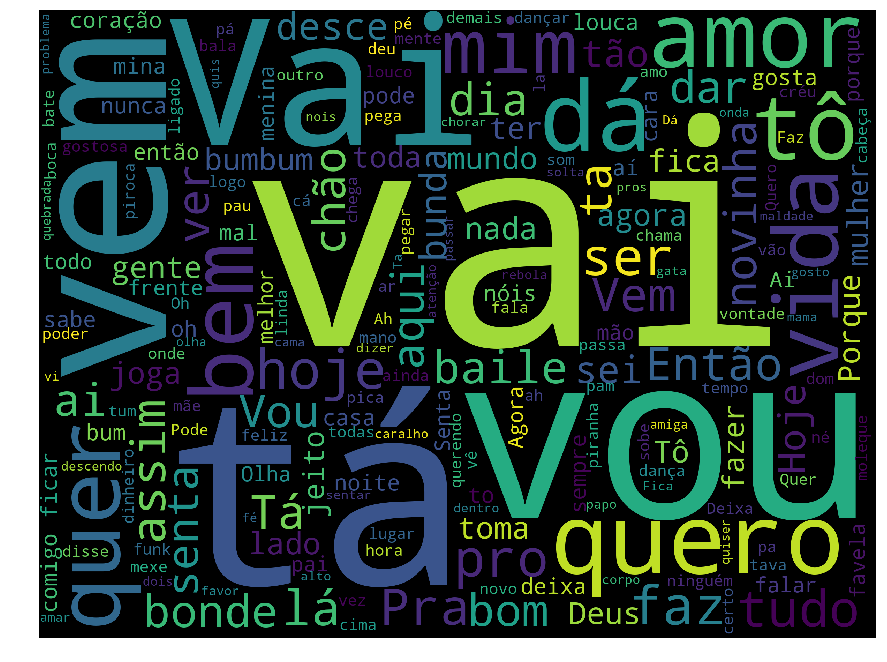

Rank|Word|Score
---|---|---
|0|bunda|3.81
|1|senta|3.70
|2|mina|3.52
|3|louca|3.45
|4|nóis|3.30
|5|pro|3.22
|6|mano|3.20
|7|desce|3.07
|8|mexe|2.94
|9|baile|2.89

gospel


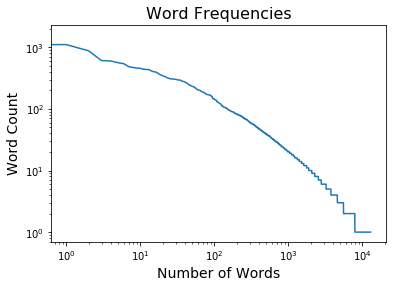

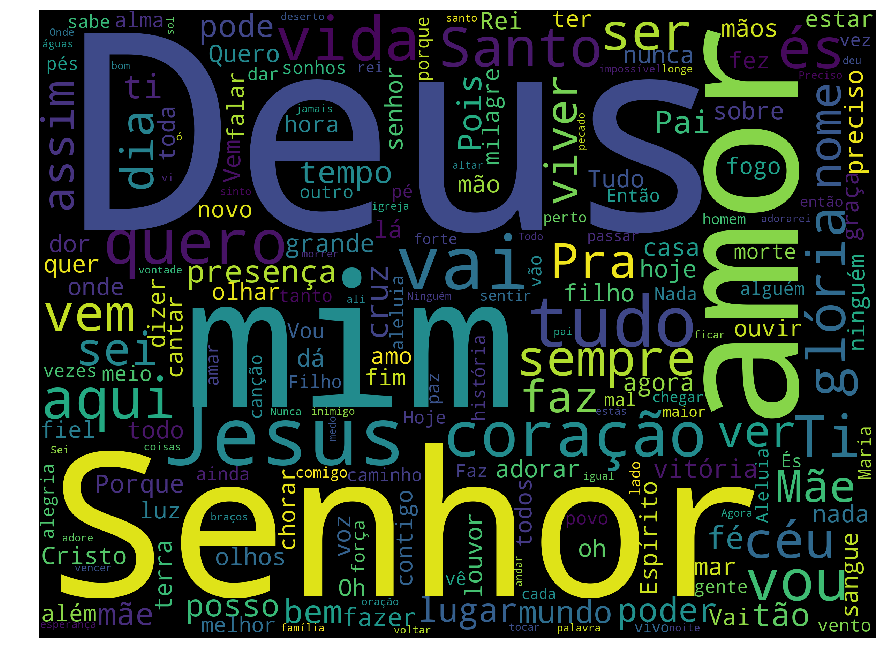

Rank|Word|Score
---|---|---
|0|amo|2.73
|1|glória|2.68
|2|amar|2.54
|3|chorar|2.30
|4|coração|2.22
|5|abraçar|2.12
|6|pecado|2.04
|7|altar|2.04
|8|céus|2.04
|9|joelhos|1.99

sertanejo


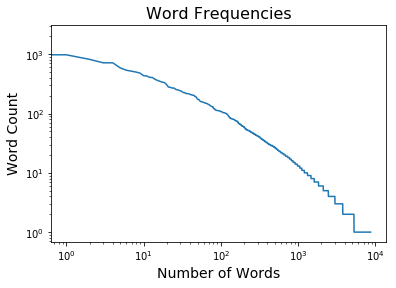

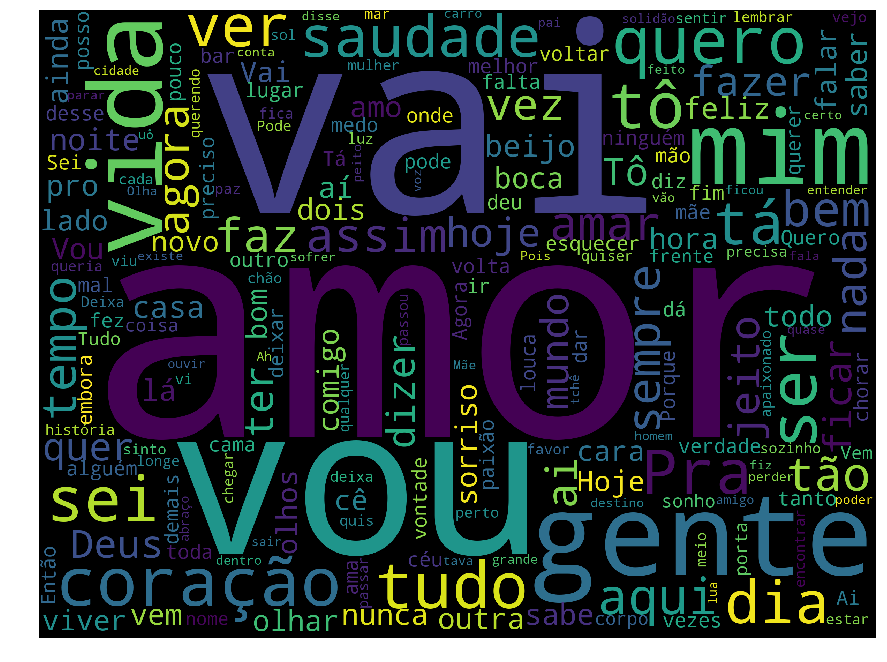

Rank|Word|Score
---|---|---
|0|amar|3.59
|1|saudade|3.47
|2|amo|3.14
|3|louca|2.70
|4|sorriso|2.52
|5|pro|2.37
|6|amor|2.36
|7|beijo|2.25
|8|coração|2.15
|9|apaixonado|2.09



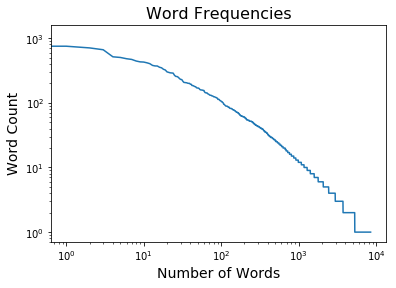

In [16]:
for f in listdir("data/raw"):
    arquivo = "data/raw/"+f
    genero_freq_dist, genero = distribuicao_frequencia(arquivo)
    word_cloud(genero_freq_dist, genero)
    distribuicao_palavras(genero_freq_dist, genero)
    genero_rank = words_corpus_ranking(genero_freq_dist, portugues_freq_dist)
    
    sorted_ranked_genero = [(x[0], x[1][0], "{:.2f}".format(x[1][1])) for x in
                       enumerate(sorted(genero_rank.items(), key=lambda x: -x[1]))]
    
    headings = ["Rank", "Word", "Score"]
    
    top_10 = list_to_markdown_table(sorted_ranked_genero[:10:1], headings)
    botton_10 = list_to_markdown_table(sorted_ranked_genero[:-10:-1], headings)
    print(top_10)
    
    with open("data/" + genero + "_rank.json", "w") as f:
        json.dump(genero_rank, f)

In [17]:
## Sem machine Learning

In [18]:
def score_genero(s):
    words = tokenizer.tokenize_strip_non_words(s)
    
    if len(words) == 0:
        return 0
    
    score = 0
    for word in words:
        score += metalness.get(word,0)
        
    return score / len(words)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import 

from sklearn.utils import Bunch
from sklearn.naive_bayes import MultinomialNB

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier


In [28]:
# Com Stemming caiu um pouco
#nltk.download('rslp')

In [29]:
# Criar um dataset

In [30]:
dataset = None
data = []
target = []

In [31]:
def pre_process(lyric):
    palavras_tokenize = tokenize.word_tokenize(lyric.decode('utf8'), language='portuguese')
    genero_freq_dist = FreqDist(palavras_tokenize)
    genero_freq_dist = remove_stopwords(genero_freq_dist)
    #genero_freq_dist = map(stemm.stem, genero_freq_dist.keys())
    return ' '.join(genero_freq_dist.keys())
    

In [32]:
# Diretamente das musicas
for f in listdir("data/raw"):
    arquivo = "data/raw/"+f
    
    genero_df, genero = carregar_arquivo(arquivo)
    #stemm = nltk.stem.RSLPStemmer()
    
    for l in genero_df.values:
        normalized = pre_process(l[0])
        data.append(normalized)
        target.append(genero)

dataset = Bunch(data=data, target=target)

    

bossa_nova
funk
gospel
sertanejo


In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.30, random_state=42)

In [36]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [37]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [38]:
teste = ["Olha que coisa mais linda, mais cheia de graça, moça do corpo dourado"] # Bossa

In [39]:
teste = ['Borboletinha, está na cozinha'] # Bossa + -

In [40]:
teste = ["Tudo que tu fazes, fazes muito bem, a cada toque teu,a cada amanhecer"] # Gospel

In [45]:
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()),])

In [46]:
text_clf = text_clf.fit(X_train, y_train)

In [47]:
scores = cross_val_score(text_clf, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
preds = text_clf.predict(X_test)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.83 (+/- 0.07)
             precision    recall  f1-score   support

 bossa_nova       0.96      0.53      0.68       261
       funk       0.94      0.79      0.86       237
     gospel       0.92      0.91      0.92       244
  sertanejo       0.54      0.92      0.68       218

avg / total       0.85      0.78      0.79       960



In [48]:
# Benchmark
text_clf.predict(teste) # Gospel

array(['gospel'], dtype='|S10')

In [49]:
## Ajustes


In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),
}

In [51]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(dataset.data, dataset.target)

In [52]:
scores = cross_val_score(gs_clf, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
preds = gs_clf.predict(X_test)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.82 (+/- 0.05)
             precision    recall  f1-score   support

 bossa_nova       1.00      0.98      0.99       261
       funk       0.99      0.97      0.98       237
     gospel       0.99      1.00      0.99       244
  sertanejo       0.96      0.98      0.97       218

avg / total       0.98      0.98      0.98       960



In [53]:
# Benchmark
gs_clf.predict(teste) # Gospel

array(['funk'], dtype='|S10')

In [54]:
text_clf_mlp = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-mlp', MLPClassifier()),
                ])

text_clf_mlp.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [55]:
scores = cross_val_score(text_clf_mlp, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
preds = text_clf_mlp.predict(X_test)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.84 (+/- 0.02)
             precision    recall  f1-score   support

 bossa_nova       0.90      0.83      0.86       261
       funk       0.90      0.86      0.88       237
     gospel       0.92      0.93      0.92       244
  sertanejo       0.72      0.83      0.77       218

avg / total       0.87      0.86      0.86       960



In [56]:
# Benchmark
text_clf_mlp.predict(teste) # Gospel

array(['gospel'], dtype='|S10')

In [57]:
text_clf_rf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-rf', RandomForestClassifier()),
                ])

text_clf_rf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [58]:
scores = cross_val_score(text_clf_rf, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
preds = text_clf_rf.predict(X_test)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.68 (+/- 0.08)
             precision    recall  f1-score   support

 bossa_nova       0.74      0.78      0.76       261
       funk       0.80      0.77      0.79       237
     gospel       0.86      0.87      0.86       244
  sertanejo       0.70      0.66      0.68       218

avg / total       0.77      0.77      0.77       960



In [59]:
# Benchmark
text_clf_rf.predict(teste) # Gospel

array(['bossa_nova'], dtype='|S10')

In [60]:
? SGDClassifier

In [61]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='modified_huber', penalty='l2',
                                            alpha=1e-3, max_iter=5,random_state=42)),
])

text_clf_svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...ty='l2', power_t=0.5, random_state=42,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [62]:
scores = cross_val_score(text_clf_svm, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
preds = text_clf_svm.predict(X_test)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.84 (+/- 0.04)
             precision    recall  f1-score   support

 bossa_nova       0.88      0.89      0.88       261
       funk       0.92      0.86      0.89       237
     gospel       0.92      0.92      0.92       244
  sertanejo       0.76      0.80      0.78       218

avg / total       0.87      0.87      0.87       960



In [63]:
# Benchmark
text_clf_svm.predict(teste) # Gospel

array(['bossa_nova'], dtype='|S10')

In [64]:
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf-svm__alpha': (1e-2, 1e-3),
}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)
print(gs_clf_svm.best_score_)


0.8526785714285714


In [65]:
scores = cross_val_score(gs_clf_svm, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
preds = gs_clf_svm.predict(X_test)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.84 (+/- 0.03)
             precision    recall  f1-score   support

 bossa_nova       0.88      0.89      0.88       261
       funk       0.92      0.86      0.89       237
     gospel       0.92      0.92      0.92       244
  sertanejo       0.76      0.80      0.78       218

avg / total       0.87      0.87      0.87       960



In [66]:
# Benchmark
gs_clf_svm.predict(teste) # Gospel

array(['bossa_nova'], dtype='|S10')

In [67]:
print("Logloss")
print("MLP: %s" % metrics.log_loss(y_test, text_clf_mlp.predict_proba(X_test)))
print("SVM: %s" % metrics.log_loss(y_test, text_clf_svm.predict_proba(X_test)))
print("SVM+: %s" % metrics.log_loss(y_test, gs_clf_svm.predict_proba(X_test)))
print("NB: %s" % metrics.log_loss(y_test, text_clf.predict_proba(X_test)))
print("RF: %s" % metrics.log_loss(y_test, text_clf_rf.predict_proba(X_test)))

Logloss
MLP: 0.415229378535782
SVM: 0.5308373557059792
SVM+: 0.5308373557059792
NB: 0.6622336229900857
RF: 1.1569111357773474


In [68]:
# Salvar modelo
# A técnica de NB foi a que menos "decorou" o conjunto de dados, ao testar com outras músicas 
# extraidas do site letras.com.br acertou a grande maioria.


In [71]:
import joblib


In [72]:
joblib.dump(text_clf, "md.pkl", compress=True)

['md.pkl']